# Project of AI Lab by Ammar Bin Yasir 20I-0501 and Usama Sajid 19I-1864

# Flight System

# Pre-Processing Part 

In [1]:
#importing the required libaries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [2]:
aircraftdata = pd.read_csv("aircraftDataset.csv")
#Reading the airport dataset
airportdata = pd.read_csv("airportDataset.csv")
#Reading the weather dataset
weatherdata = pd.read_csv("weatherDataset.csv")

# Aircraft Data

In [3]:
#Showing the initial dataset in the jupyter note book
print("The Aircraft: ")
aircraftdata.head(5)

The Aircraft: 


Aircraft Type    Max Range  Cruise Speed  Fuel Consumption at Cruise  \
0    Aircraft 1  3524.704974    440.407155                 1084.211636   
1    Aircraft 2  7463.252518    474.475130                  494.213927   
2    Aircraft 3  7810.298939    463.793756                  402.758677   
3    Aircraft 4  1442.066536    188.000000                  788.008426   
4    Aircraft 5  6261.240012    411.286311                  993.237674   

  ICAO CODES  
0       MULT  
1       KARA  
2       PESH  
3       SIAL  
4       SUKK

In [4]:
aircraftdata.columns

Index(['Aircraft Type', 'Max Range', 'Cruise Speed',
       'Fuel Consumption at Cruise', 'ICAO CODES'],
      dtype='object')

In [5]:
aircraftdata.shape

(700, 5)

In [6]:
# Specify columns to clean
columns_to_clean = ['Max Range', 'Cruise Speed', 'Fuel Consumption at Cruise']

In [7]:
aircraft_data_cleaned = aircraftdata.dropna(subset=columns_to_clean)

In [8]:
# Fill NaN values in the specified columns with default values
default_values = {'Max Range': 0, 'Cruise Speed': 0, 'Fuel Consumption at Cruise': 0}
aircraftdata = aircraftdata.fillna(value=default_values)

In [9]:
aircraftdata.head(5)

Aircraft Type    Max Range  Cruise Speed  Fuel Consumption at Cruise  \
0    Aircraft 1  3524.704974    440.407155                 1084.211636   
1    Aircraft 2  7463.252518    474.475130                  494.213927   
2    Aircraft 3  7810.298939    463.793756                  402.758677   
3    Aircraft 4  1442.066536    188.000000                  788.008426   
4    Aircraft 5  6261.240012    411.286311                  993.237674   

  ICAO CODES  
0       MULT  
1       KARA  
2       PESH  
3       SIAL  
4       SUKK

# Airport Data

In [10]:
print("The Airport: ")
airportdata.head(5)

The Airport: 


ICAO Code  Latitude  Longitude      City
0      ISLA      2580       2886  Peshawar
1      ISLA      3785       2691   Karachi
2      ISLA      2225        264    Lahore
3      ISLA       106       2616    Quetta
4      ISLA      1799       2184    Multan

In [11]:
airportdata.columns

Index(['ICAO Code', 'Latitude', 'Longitude', 'City'], dtype='object')

In [12]:
airportdata.shape

(132, 4)

In [13]:
# Remove NaN values in 'Latitude' and 'Longitude' columns
airportdata['Latitude'] = airportdata['Latitude'].fillna(airportdata['Latitude'].mean())
airportdata['Longitude'] = airportdata['Longitude'].fillna(airportdata['Longitude'].mean())

In [14]:
airportdata.head(5)

ICAO Code  Latitude  Longitude      City
0      ISLA      2580       2886  Peshawar
1      ISLA      3785       2691   Karachi
2      ISLA      2225        264    Lahore
3      ISLA       106       2616    Quetta
4      ISLA      1799       2184    Multan

# Weather Data

In [15]:
print("The weather: ")
weatherdata.head(5)

The weather: 


Date  Wind Speed  Wind Direction        City
0  2007-01-01   24.316468      255.233176      Multan
1  2007-01-01   28.748364      104.971560   Islamabad
2  2007-01-01   27.188154      170.915093  Gujranwala
3  2007-01-01    8.418233      268.304630     Karachi
4  2007-01-01    1.945127      648.329295     Sialkot

In [16]:
weatherdata.columns

Index(['Date', 'Wind Speed', 'Wind Direction', 'City'], dtype='object')

In [17]:
weatherdata.shape

(60000, 4)

In [18]:
weatherdata['Wind Speed'].fillna(0, inplace=True)
weatherdata['Wind Direction'].fillna(0, inplace=True)

In [19]:
weatherdata.dropna(subset=['Wind Speed', 'Wind Direction'], inplace=True)

In [20]:
weatherdata.head(5)

Date  Wind Speed  Wind Direction        City
0  2007-01-01   24.316468      255.233176      Multan
1  2007-01-01   28.748364      104.971560   Islamabad
2  2007-01-01   27.188154      170.915093  Gujranwala
3  2007-01-01    8.418233      268.304630     Karachi
4  2007-01-01    1.945127      648.329295     Sialkot

<Figure size 800x600 with 0 Axes>

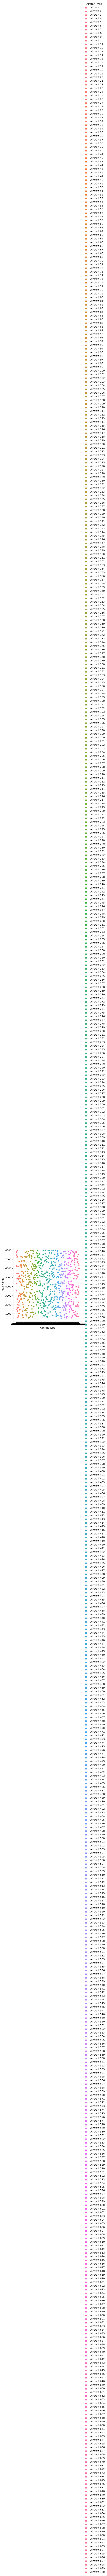

In [21]:
plt.figure(figsize=(8, 6))
sns.relplot(
    data = aircraftdata,x = "Aircraft Type",y = "Max Range", hue = "Aircraft Type"
)

plt.show()


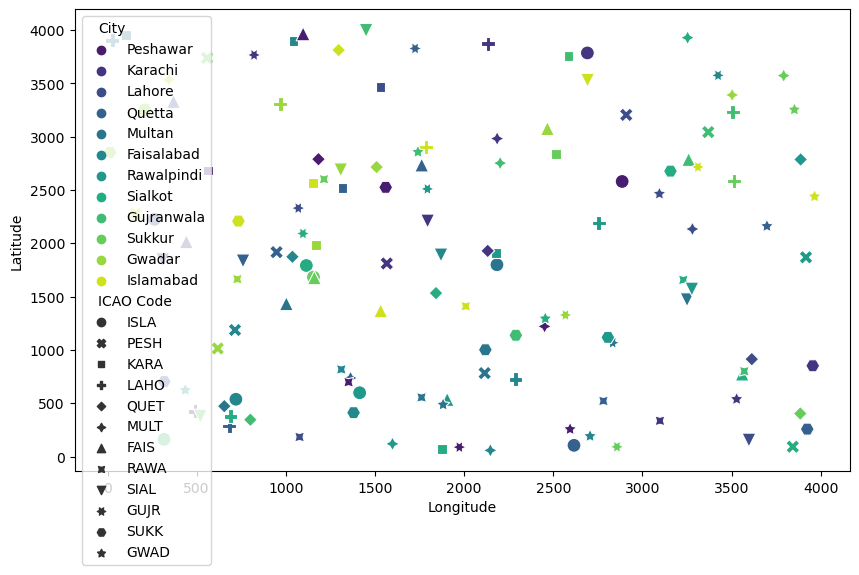

In [22]:
#And now we will compare the longitutde and latitude of different citites
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=airportdata, hue='City', style='ICAO Code',palette='viridis', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [23]:
showing_airport_icoa = airportdata[["ICAO Code","City","Latitude","Longitude"]]

print(showing_airport_icoa)

    ICAO Code        City  Latitude  Longitude
0        ISLA    Peshawar      2580       2886
1        ISLA     Karachi      3785       2691
2        ISLA      Lahore      2225        264
3        ISLA      Quetta       106       2616
4        ISLA      Multan      1799       2184
..        ...         ...       ...        ...
127      GWAD  Faisalabad       192       2706
128      GWAD  Rawalpindi       624        436
129      GWAD     Sialkot      1294       2455
130      GWAD  Gujranwala      2856       1741
131      GWAD      Sukkur      3253       3852

[132 rows x 4 columns]


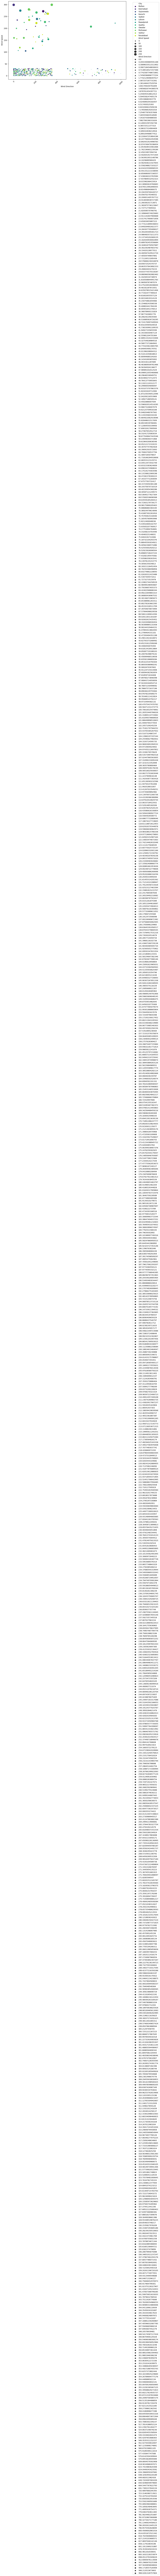

In [24]:
#and now i will show the weather plot different wind speed and direction with its cities
#It takes too much time as the values are up to 60,000
#So i took a limited data up to just 1000 values

limited_data = weatherdata.head(1000)


plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='Wind Direction', y='Wind Speed', data=limited_data, hue='City', style='Wind Direction', size='Wind Speed', palette='viridis', sizes=(20, 200))

# Rotated the x-axis labels for better reading the graph
plt.xticks(rotation=45)

plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

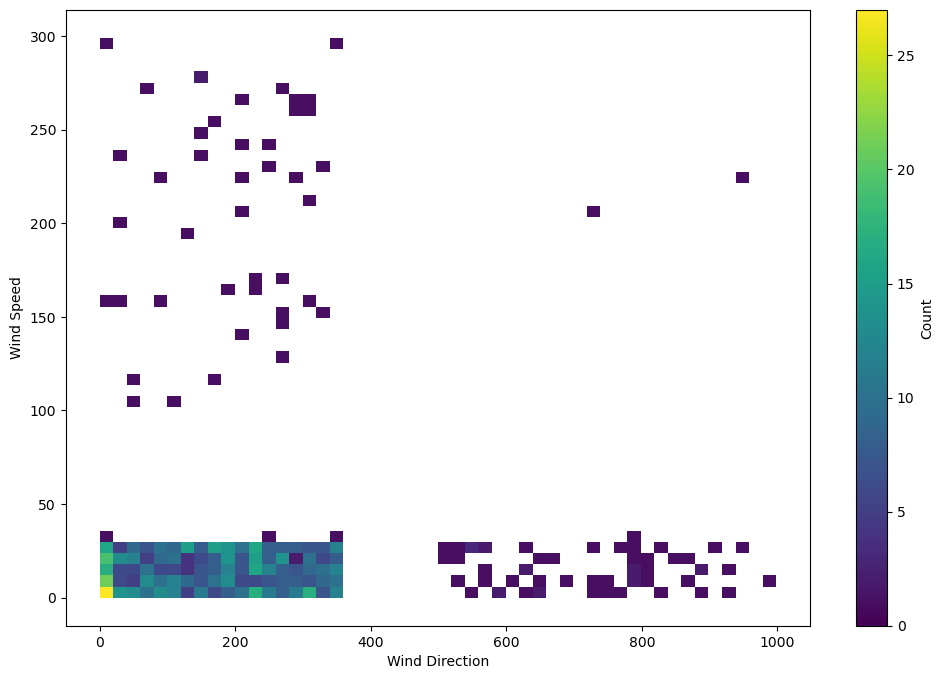

In [25]:
#And now i will show the heatmap of this data of weather
limited_data = weatherdata.head(1000)

plt.figure(figsize=(12, 8))
sns.histplot(x='Wind Direction', y='Wind Speed', data=limited_data, bins=(50, 50), cmap='viridis', cbar=True, cbar_kws={'label': 'Count'})

plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')

plt.show()

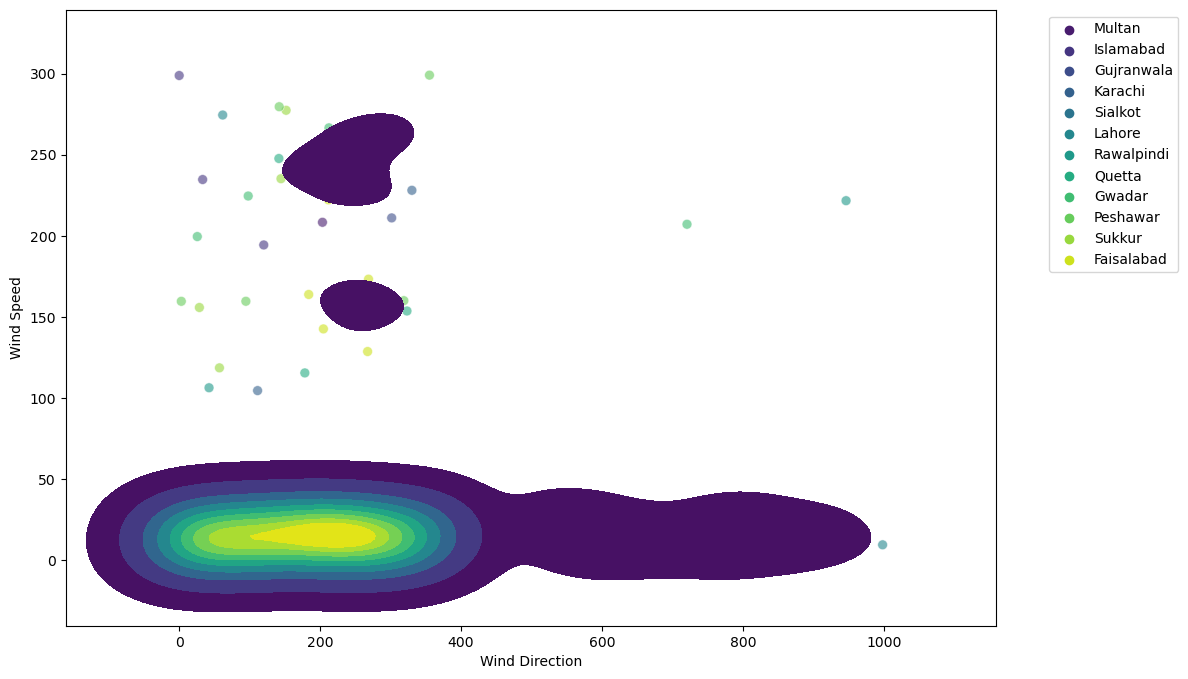

In [26]:
limited_data = weatherdata.head(1000)
plt.figure(figsize=(12, 8))


sns.scatterplot(x='Wind Direction', y='Wind Speed', data=limited_data, hue='City', palette='viridis', s=50, alpha=0.6)

# Contour plot for density
sns.kdeplot(x='Wind Direction', y='Wind Speed', data=limited_data, cmap='viridis', fill=True)

plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Route Optimization and Optimatization Metrics and Fitness fuction Part

In [27]:
# Constants
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
POPULATION_SIZE = 100
NUM_GENERATIONS = 30


# Function to calculate distance between two airports using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Haversine formula implementation
    R = 6371  # Radius of the Earth in kilometers

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)

    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Example crossover and mutation functions
def crossover(parents):
    # Order crossover
    offspring = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]
        start, end = np.sort(np.random.choice(len(parent1), size=2, replace=False))
        child = [-1] * len(parent1)

        child[start:end + 1] = parent1[start:end + 1]
        remaining = [gene for gene in parent2 if gene not in child]

        for i in range(len(child)):
            if child[i] == -1:
                child[i] = remaining.pop(0)

        offspring.append(child)

    return offspring

def mutate(individual, mutation_rate):
    # Swap mutation
    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
        if np.random.rand() < mutation_rate:
            j = np.random.randint(len(mutated_individual))
            mutated_individual[i], mutated_individual[j] = mutated_individual[j], mutated_individual[i]

    return mutated_individual

# Fitness function using Aircraft dataset
def calculate_fitness_aircraft(route, aircraftdata):
    total_fuel_consumption = 0

    for i in range(len(route) - 1):
        # Extract relevant information for the current leg of the route
        current_aircraft = aircraftdata.loc[aircraftdata['ICAO CODES'] == route[i]]
        
        # Example: Calculate fuel consumption based on distance and aircraft performance
        fuel_consumption = haversine(
            airportdata.loc[airportdata['ICAO Code'] == route[i], 'Latitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i], 'Longitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i + 1], 'Latitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i + 1], 'Longitude'].values[0]
        ) * current_aircraft['Fuel Consumption at Cruise'].values[0]

        total_fuel_consumption += fuel_consumption

    # Minimize total fuel consumption as the optimization objective
    fitness_value = total_fuel_consumption

    return fitness_value

# Fitness function using Airport dataset
def calculate_fitness_airport(route, airportdata):
    total_distance = 0

    for i in range(len(route) - 1):
        # Calculate distance between airports using Haversine formula
        leg_distance = haversine(
            airportdata.loc[airportdata['ICAO Code'] == route[i], 'Latitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i], 'Longitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i + 1], 'Latitude'].values[0],
            airportdata.loc[airportdata['ICAO Code'] == route[i + 1], 'Longitude'].values[0]
        )

        total_distance += leg_distance

    # Minimize total distance as the optimization objective
    fitness_value = total_distance

    return fitness_value

# Fitness function using Weather dataset
def calculate_fitness_weather(route, weatherdata, airportdata):
    total_wind_penalty = 0

    for i in range(len(route) - 1):
        # Extract relevant information for the current leg of the route
        current_city = airportdata.loc[airportdata['ICAO Code'] == route[i], 'City'].values[0]
        current_weather = weatherdata.loc[weatherdata['City'] == current_city]

        # Example: Penalize routes with higher wind speed
        wind_penalty = current_weather['Wind Speed'].values[0]  # You can modify this based on your criteria

        total_wind_penalty += wind_penalty

    # Minimize total wind penalty as the optimization objective
    fitness_value = total_wind_penalty

    return fitness_value

# Initialize the initial population with shuffled ICAO codes
unique_airports = airportdata['ICAO Code'].unique()
population_aircraft = [np.random.permutation(unique_airports) for _ in range(POPULATION_SIZE)]
population_airport = [np.random.permutation(unique_airports) for _ in range(POPULATION_SIZE)]
population_weather = [np.random.permutation(unique_airports) for _ in range(POPULATION_SIZE)]

# Airport fitness function and its Optimized performance:

In [28]:
print("Airport Routes : ")
print(" ")
for generation in range(NUM_GENERATIONS):
    # Evaluate fitness of each individual in the population for each dataset
    fitness_airport = [calculate_fitness_airport(route, airportdata) for route in population_airport]

    # Print the best route and fitness for each dataset in the current generation
    best_route_airport = population_airport[np.argmin(fitness_airport)]
    best_fitness_airport = min(fitness_airport)
    print(f"Generation {generation + 1} - Best Route (Airport): {best_route_airport}, Fitness: {best_fitness_airport}")

    # Normalize fitness values for each dataset separately
    sum_fitness_airport = np.sum(fitness_airport)

    # Check if the sum is zero to avoid division by zero
    normalized_fitness_airport = np.ones(POPULATION_SIZE) / POPULATION_SIZE if sum_fitness_airport == 0 else np.array(fitness_airport) / sum_fitness_airport

    # Ensure probabilities sum to 1
    normalized_fitness_airport /= normalized_fitness_airport.sum()

    # Select individuals for crossover separately for each dataset
    selected_indices_airport = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=normalized_fitness_airport)

    # Create a new population from the selected individuals separately for each dataset
    new_population_airport = []

    for i in range(POPULATION_SIZE):
        # Select parents with replacement based on their fitness
        parents_airport = [population_airport[idx] for idx in np.random.choice(selected_indices_airport, size=2, replace=True)]

        # Perform crossover and mutation to create new individuals separately for each dataset
        child_airport = mutate(crossover(parents_airport)[0], MUTATION_RATE)

        new_population_airport.append(child_airport)

    # Elitism: Keep the best individuals from the previous generation for each dataset
    new_population_airport[0] = population_airport[np.argmin(fitness_airport)]

    # Replace the old populations with the new populations for each dataset
    population_airport = new_population_airport

    # Break the loop after 50 generations
    if generation == NUM_GENERATIONS - 1:
        break

# Return the best route found for each dataset
best_route_airport = population_airport[np.argmin(fitness_airport)]

# Display the final optimized route for each dataset
print("Final Optimized Route (Airport):", best_route_airport)

Airport Routes : 
 
Generation 1 - Best Route (Airport): ['GWAD' 'GUJR' 'MULT' 'SIAL' 'RAWA' 'FAIS' 'QUET' 'PESH' 'KARA' 'LAHO'
 'ISLA' 'SUKK'], Fitness: 71537.32008758654
Generation 2 - Best Route (Airport): ['SIAL', 'GUJR', 'GWAD', 'MULT', 'RAWA', 'FAIS', 'QUET', 'KARA', 'LAHO', 'PESH', 'ISLA', 'SUKK'], Fitness: 64803.30986822018
Generation 3 - Best Route (Airport): ['RAWA', 'SIAL', 'GUJR', 'GWAD', 'MULT', 'FAIS', 'QUET', 'SUKK', 'LAHO', 'PESH', 'ISLA', 'KARA'], Fitness: 56415.02486421646
Generation 4 - Best Route (Airport): ['RAWA', 'SIAL', 'GUJR', 'GWAD', 'MULT', 'FAIS', 'QUET', 'SUKK', 'LAHO', 'PESH', 'ISLA', 'KARA'], Fitness: 56415.02486421646
Generation 5 - Best Route (Airport): ['RAWA', 'SIAL', 'GUJR', 'GWAD', 'MULT', 'FAIS', 'QUET', 'SUKK', 'LAHO', 'PESH', 'ISLA', 'KARA'], Fitness: 56415.02486421646
Generation 6 - Best Route (Airport): ['RAWA', 'SIAL', 'GUJR', 'GWAD', 'MULT', 'FAIS', 'QUET', 'SUKK', 'LAHO', 'PESH', 'ISLA', 'KARA'], Fitness: 56415.02486421646
Generation 7 - Bes

# Aircraft fitness function and its Optimized performance:

In [29]:
print("Aircraft Routes : ")
print(" ")
for generation in range(NUM_GENERATIONS):
    # Evaluate fitness of each individual in the population for each dataset
    fitness_aircraft = [calculate_fitness_aircraft(route, aircraftdata) for route in population_aircraft]

    best_route_aircraft = population_aircraft[np.argmin(fitness_aircraft)]
    best_fitness_aircraft = min(fitness_aircraft)
    print(f"Generation {generation + 1} - Best Route (Aircraft): {best_route_aircraft}, Fitness: {best_fitness_aircraft}")
    
    # Normalize fitness values for each dataset separately
    sum_fitness_aircraft = np.sum(fitness_aircraft)

    # Check if the sum is zero to avoid division by zero
    normalized_fitness_aircraft = np.ones(POPULATION_SIZE) / POPULATION_SIZE if sum_fitness_aircraft == 0 else np.array(fitness_aircraft) / sum_fitness_aircraft
  
    # Ensure probabilities sum to 1
    normalized_fitness_aircraft /= normalized_fitness_aircraft.sum()

    # Select individuals for crossover separately for each dataset
    selected_indices_aircraft = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=normalized_fitness_aircraft)

    # Create a new population from the selected individuals separately for each dataset
    new_population_aircraft = []

    for i in range(POPULATION_SIZE):
        # Select parents with replacement based on their fitness
        parents_aircraft = [population_aircraft[idx] for idx in np.random.choice(selected_indices_aircraft, size=2, replace=True)]

        # Perform crossover and mutation to create new individuals separately for each dataset
        child_aircraft = mutate(crossover(parents_aircraft)[0], MUTATION_RATE)

        new_population_aircraft.append(child_aircraft)

    # Elitism: Keep the best individuals from the previous generation for each dataset
    new_population_aircraft[0] = population_aircraft[np.argmin(fitness_aircraft)]

    # Replace the old populations with the new populations for each dataset
    population_aircraft = new_population_aircraft

    # Break the loop after 50 generations
    if generation == NUM_GENERATIONS - 1:
        break

# Return the best route found for each dataset
best_route_aircraft = population_aircraft[np.argmin(fitness_aircraft)]

# Display the final optimized route for each dataset
print("Final Optimized Route (Aircraft):", best_route_aircraft)

Aircraft Routes : 
 
Generation 1 - Best Route (Aircraft): ['PESH' 'RAWA' 'GUJR' 'SUKK' 'ISLA' 'QUET' 'FAIS' 'MULT' 'LAHO' 'KARA'
 'GWAD' 'SIAL'], Fitness: 54263285.196486324
Generation 2 - Best Route (Aircraft): ['GWAD', 'SIAL', 'MULT', 'QUET', 'FAIS', 'RAWA', 'GUJR', 'PESH', 'KARA', 'LAHO', 'ISLA', 'SUKK'], Fitness: 37305430.94902349
Generation 3 - Best Route (Aircraft): ['GWAD', 'SIAL', 'MULT', 'QUET', 'FAIS', 'RAWA', 'GUJR', 'PESH', 'KARA', 'LAHO', 'ISLA', 'SUKK'], Fitness: 37305430.94902349
Generation 4 - Best Route (Aircraft): ['GWAD', 'SIAL', 'MULT', 'QUET', 'FAIS', 'RAWA', 'GUJR', 'PESH', 'KARA', 'LAHO', 'ISLA', 'SUKK'], Fitness: 37305430.94902349
Generation 5 - Best Route (Aircraft): ['GWAD', 'SIAL', 'MULT', 'QUET', 'FAIS', 'RAWA', 'GUJR', 'PESH', 'KARA', 'LAHO', 'ISLA', 'SUKK'], Fitness: 37305430.94902349
Generation 6 - Best Route (Aircraft): ['GWAD', 'SIAL', 'MULT', 'QUET', 'FAIS', 'RAWA', 'GUJR', 'PESH', 'KARA', 'LAHO', 'ISLA', 'SUKK'], Fitness: 37305430.94902349
Generation

# Weather fitness function and its Optimized performance:

In [30]:
print("Weather Routes : ")
print(" ")
for generation in range(NUM_GENERATIONS):
    # Evaluate fitness of each individual in the population for each dataset
    fitness_weather = [calculate_fitness_weather(route, weatherdata, airportdata) for route in population_weather]

    # Print the best route and fitness for each dataset in the current generation
    best_route_weather = population_weather[np.argmin(fitness_weather)]
    best_fitness_weather = min(fitness_weather)
    print(f"Generation {generation + 1} - Best Route (Weather): {best_route_weather}, Fitness: {best_fitness_weather}")

    # Normalize fitness values for each dataset separately
    sum_fitness_weather = np.sum(fitness_weather)

    # Check if the sum is zero to avoid division by zero
    normalized_fitness_weather = np.ones(POPULATION_SIZE) / POPULATION_SIZE if sum_fitness_weather == 0 else np.array(fitness_weather) / sum_fitness_weather

    # Ensure probabilities sum to 1
    normalized_fitness_weather /= normalized_fitness_weather.sum()

    # Select individuals for crossover separately for each dataset
    selected_indices_weather = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=normalized_fitness_weather)

    # Create a new population from the selected individuals separately for each dataset
    new_population_weather = []

    for i in range(POPULATION_SIZE):
        # Select parents with replacement based on their fitness
        parents_weather = [population_weather[idx] for idx in np.random.choice(selected_indices_weather, size=2, replace=True)]

        # Perform crossover and mutation to create new individuals separately for each dataset
        child_weather = mutate(crossover(parents_weather)[0], MUTATION_RATE)

        new_population_weather.append(child_weather)

    # Elitism: Keep the best individuals from the previous generation for each dataset
    new_population_weather[0] = population_weather[np.argmin(fitness_weather)]

    # Replace the old populations with the new populations for each dataset
    population_weather = new_population_weather

    # Break the loop after 50 generations
    if generation == NUM_GENERATIONS - 1:
        break

# Return the best route found for each dataset
best_route_weather = population_weather[np.argmin(fitness_weather)]

# Display the final optimized route for each dataset
print("Final Optimized Route (Weather):", best_route_weather)

Weather Routes : 
 
Generation 1 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 2 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 3 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 4 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 5 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 6 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'GWAD' 'QUET' 'GUJR' 'PESH' 'LAHO' 'MULT'
 'SIAL' 'ISLA'], Fitness: 316.2320006915166
Generation 7 - Best Route (Weather): ['FAIS' 'SUKK' 'RAWA' 'KARA' 'G

# Fitness functions and its Final Optimized Routes:

In [31]:
# Constants
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
POPULATION_SIZE = 100
NUM_GENERATIONS = 30

# Function to calculate distance between two airports using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Haversine formula implementation
    R = 6371  # Radius of the Earth in kilometers

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)

    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Example crossover and mutation functions
def crossover(parents):
    # Order crossover
    offspring = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]
        start, end = np.sort(np.random.choice(len(parent1), size=2, replace=False))
        child = [-1] * len(parent1)

        child[start:end + 1] = parent1[start:end + 1]
        remaining = [gene for gene in parent2 if gene not in child]

        for i in range(len(child)):
            if child[i] == -1:
                child[i] = remaining.pop(0)

        offspring.append(child)

    return offspring

def mutate(individual, mutation_rate):
    # Swap mutation
    mutated_individual = individual.copy()
    for i in range(len(mutated_individual)):
        if np.random.rand() < mutation_rate:
            j = np.random.randint(len(mutated_individual))
            mutated_individual[i], mutated_individual[j] = mutated_individual[j], mutated_individual[i]

    return mutated_individual

# Fitness function
def calculate_fitness(route, aircraftdata, weatherdata, airportdata):
    total_distance = 0
    total_fuel_consumption = 0

    # Default values if columns are not present
    default_aircraft = pd.DataFrame({'Fuel Consumption at Cruise': [1.0]})
    default_airport = pd.DataFrame({'Latitude': [0.0], 'Longitude': [0.0]})
    default_weather = pd.DataFrame({'Wind Speed': [0.0]})

    for i in range(len(route) - 1):
        # Extract relevant information for the current leg of the route
        current_aircraft = aircraftdata.loc[aircraftdata['ICAO Code'] == route[i]] if 'ICAO Code' in aircraftdata.columns else default_aircraft
        current_airport = airportdata.loc[airportdata['ICAO Code'] == route[i]] if 'ICAO Code' in airportdata.columns else default_airport
        next_airport = airportdata.loc[airportdata['ICAO Code'] == route[i + 1]] if 'ICAO Code' in airportdata.columns else default_airport
        current_weather = weatherdata.loc[weatherdata['City'] == current_airport['City'].values[0]] if 'City' in weatherdata.columns else default_weather

        # Calculate distance between airports using Haversine formula
        leg_distance = haversine(current_airport['Latitude'].values[0], current_airport['Longitude'].values[0],
                                  next_airport['Latitude'].values[0], next_airport['Longitude'].values[0])

        # Example: Calculate fuel consumption based on distance, aircraft performance, and weather conditions
        fuel_consumption = leg_distance * current_aircraft['Fuel Consumption at Cruise'].values[0] * (
                1 + current_weather['Wind Speed'].values[0] / 100)

        total_distance += leg_distance
        total_fuel_consumption += fuel_consumption

    # Example: Minimize total fuel consumption as the optimization objective
    fitness_value = total_fuel_consumption

    return fitness_value

# Initialize the initial population with shuffled ICAO codes
unique_airports = airportdata['ICAO Code'].unique()
population = [np.random.permutation(unique_airports) for _ in range(POPULATION_SIZE)]

for generation in range(NUM_GENERATIONS):
    # Evaluate fitness of each individual in the population
    fitness_values = [calculate_fitness(route, aircraftdata, weatherdata, airportdata) for route in population]

    # Print the best route of the current generation
    best_route_idx = np.argmin(fitness_values)
    best_route = population[best_route_idx]
    best_fitness = fitness_values[best_route_idx]
    print(f"Generation {generation + 1} - Best Route: {best_route}, Fitness: {best_fitness}")

    # Normalize fitness values to create probabilities
    normalized_fitness = np.array(fitness_values) / np.sum(fitness_values)

    # Ensure probabilities sum to 1
    normalized_fitness /= normalized_fitness.sum()

    # Select individuals for crossover
    selected_indices = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=normalized_fitness)

    # Create a new population from the selected individuals
    new_population = []

    for i in range(POPULATION_SIZE):
        # Select parents with replacement based on their fitness
        parents = [population[idx] for idx in np.random.choice(selected_indices, size=2, replace=True)]

        # Perform crossover and mutation to create a new individual
        child = mutate(crossover(parents)[0], MUTATION_RATE)

        new_population.append(child)

    # Elitism: Keep the best individual from the previous generation
    new_population[0] = population[np.argmin(fitness_values)]

    # Replace the old population with the new population
    population = new_population

    # Break the loop after 50 generations
    if generation == NUM_GENERATIONS - 1:
        break

# Return the best route found
best_route = population[np.argmin(fitness_values)]

# Display the final optimized route
print("Final Optimized Route:", best_route)

Generation 1 - Best Route: ['ISLA' 'PESH' 'SUKK' 'LAHO' 'GUJR' 'KARA' 'SIAL' 'MULT' 'FAIS' 'QUET'
 'GWAD' 'RAWA'], Fitness: 100417.24454882315
Generation 2 - Best Route: ['LAHO', 'KARA', 'SIAL', 'RAWA', 'GUJR', 'FAIS', 'QUET', 'MULT', 'GWAD', 'PESH', 'ISLA', 'SUKK'], Fitness: 95364.11677277987
Generation 3 - Best Route: ['LAHO', 'KARA', 'SIAL', 'RAWA', 'GUJR', 'FAIS', 'QUET', 'MULT', 'GWAD', 'PESH', 'ISLA', 'SUKK'], Fitness: 95364.11677277987
Generation 4 - Best Route: ['LAHO', 'KARA', 'SIAL', 'RAWA', 'GUJR', 'FAIS', 'QUET', 'MULT', 'GWAD', 'PESH', 'ISLA', 'SUKK'], Fitness: 95364.11677277987
Generation 5 - Best Route: ['LAHO', 'KARA', 'SIAL', 'RAWA', 'GUJR', 'FAIS', 'QUET', 'MULT', 'GWAD', 'PESH', 'ISLA', 'SUKK'], Fitness: 95364.11677277987
Generation 6 - Best Route: ['RAWA', 'SIAL', 'MULT', 'ISLA', 'PESH', 'SUKK', 'KARA', 'LAHO', 'GUJR', 'GWAD', 'FAIS', 'QUET'], Fitness: 87757.07696071794
Generation 7 - Best Route: ['RAWA', 'SIAL', 'MULT', 'ISLA', 'PESH', 'SUKK', 'KARA', 'LAHO', 'GUJR

# Visulization of fitness functions as a whole Part

# Line Graph visualization

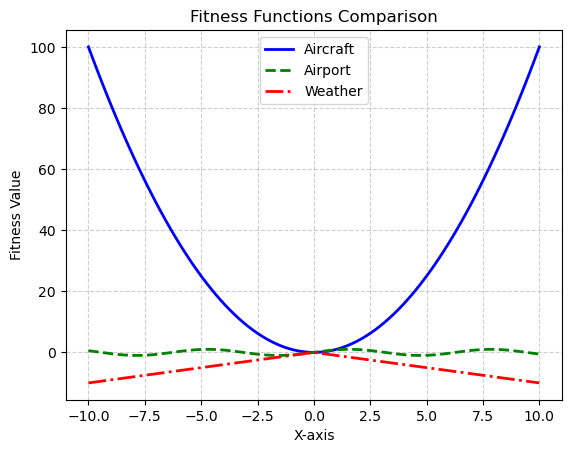

In [32]:
# Define your fitness functions
def calculate_fitness_aircraft(x):
    return x**2

def calculate_fitness_airport(x):
    return np.sin(x)

def calculate_fitness_weather(x):
    return -np.abs(x)

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Calculate y values for each fitness function
y_values_1 = calculate_fitness_aircraft(x_values)
y_values_2 = calculate_fitness_airport(x_values)
y_values_3 = calculate_fitness_weather(x_values)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each fitness function with customizations
ax.plot(x_values, y_values_1, label='Aircraft', linestyle='-', color='blue', linewidth=2)
ax.plot(x_values, y_values_2, label='Airport', linestyle='--', color='green', linewidth=2)
ax.plot(x_values, y_values_3, label='Weather', linestyle='-.', color='red', linewidth=2)

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Fitness Value')
ax.set_title('Fitness Functions Comparison')
ax.legend()

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# Bar chart visulazation

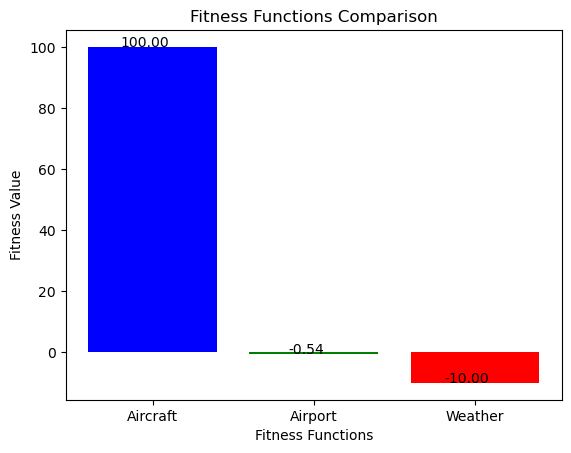

In [33]:
# Define your fitness functions
def calculate_fitness_aircraft(x):
    return x**2

def calculate_fitness_airport(x):
    return np.sin(x)

def calculate_fitness_weather(x):
    return -np.abs(x)

# Generate x values
x_values = ['Aircraft', 'Airport', 'Weather']
y_values = [calculate_fitness_aircraft(10), calculate_fitness_airport(10), calculate_fitness_weather(10)]  

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(x_values, y_values, color=['blue', 'green', 'red'])

# Add data values on top of the bars
for bar, y_value in zip(bars, y_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.1, f'{y_value:.2f}', ha='center')

# Add labels and a title
ax.set_xlabel('Fitness Functions')
ax.set_ylabel('Fitness Value')
ax.set_title('Fitness Functions Comparison')

# Show the plot
plt.show()


# Implemention of UI interface (we will be using Flask) Part:

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd  

app = Flask(__name__)


@app.route("/")
def index():
    return render_template("FlightSystem.html")

@app.route("/search", methods=["GET"])
def search():
    background_url = request.args.get('background-url')
     
    # Initialize the initial population with shuffled ICAO codes
    unique_airports = airportdata['ICAO Code'].unique()
    population = [np.random.permutation(unique_airports) for _ in range(POPULATION_SIZE)]

    for generation in range(NUM_GENERATIONS):
        # Evaluate fitness of each individual in the population
        fitness_values = [calculate_fitness(route, aircraftdata, weatherdata, airportdata) for route in population]

        # Print the best route of the current generation
        best_route_idx = np.argmin(fitness_values)
        best_route = population[best_route_idx]
        best_fitness = fitness_values[best_route_idx]
        print(f"Generation {generation + 1} - Best Route: {best_route}, Fitness: {best_fitness}")

        # Normalize fitness values to create probabilities
        normalized_fitness = np.array(fitness_values) / np.sum(fitness_values)

        # Ensure probabilities sum to 1
        normalized_fitness /= normalized_fitness.sum()

        # Select individuals for crossover
        selected_indices = np.random.choice(range(POPULATION_SIZE), size=POPULATION_SIZE, replace=True, p=normalized_fitness)

        # Create a new population from the selected individuals
        new_population = []

        for i in range(POPULATION_SIZE):
            # Select parents with replacement based on their fitness
            parents = [population[idx] for idx in np.random.choice(selected_indices, size=2, replace=True)]

            # Perform crossover and mutation to create a new individual
            child = mutate(crossover(parents)[0], MUTATION_RATE)

            new_population.append(child)

        # Elitism: Keep the best individual from the previous generation
        new_population[0] = population[np.argmin(fitness_values)]

        # Replace the old population with the new population
        population = new_population

        # Break the loop after 50 generations
        if generation == NUM_GENERATIONS - 1:
            break

    # Return the best route found
    best_route = population[np.argmin(fitness_values)]

    return render_template("new_page.html", background_url=background_url, best_route=best_route)

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Nov/2023 21:07:58] "GET / HTTP/1.1" 200 -


Generation 1 - Best Route: ['MULT' 'FAIS' 'SIAL' 'GWAD' 'SUKK' 'PESH' 'ISLA' 'KARA' 'QUET' 'RAWA'
 'GUJR' 'LAHO'], Fitness: 91184.0736672284
Generation 2 - Best Route: ['MULT' 'FAIS' 'SIAL' 'GWAD' 'SUKK' 'PESH' 'ISLA' 'KARA' 'QUET' 'RAWA'
 'GUJR' 'LAHO'], Fitness: 91184.0736672284
Generation 3 - Best Route: ['MULT' 'FAIS' 'SIAL' 'GWAD' 'SUKK' 'PESH' 'ISLA' 'KARA' 'QUET' 'RAWA'
 'GUJR' 'LAHO'], Fitness: 91184.0736672284
Generation 4 - Best Route: ['MULT', 'SIAL', 'FAIS', 'GWAD', 'KARA', 'SUKK', 'PESH', 'LAHO', 'ISLA', 'GUJR', 'RAWA', 'QUET'], Fitness: 91179.58644086271
Generation 5 - Best Route: ['MULT', 'SIAL', 'FAIS', 'GWAD', 'KARA', 'SUKK', 'PESH', 'LAHO', 'ISLA', 'GUJR', 'RAWA', 'QUET'], Fitness: 91179.58644086271
Generation 6 - Best Route: ['MULT', 'SIAL', 'FAIS', 'GWAD', 'KARA', 'SUKK', 'PESH', 'LAHO', 'ISLA', 'GUJR', 'RAWA', 'QUET'], Fitness: 91179.58644086271
Generation 7 - Best Route: ['MULT', 'SIAL', 'FAIS', 'GWAD', 'KARA', 'SUKK', 'PESH', 'LAHO', 'ISLA', 'GUJR', 'RAWA', 'QUET

127.0.0.1 - - [22/Nov/2023 21:09:51] "GET /search?departing-airport=Multan&arrival-airport=Faisalabad&departure-date=2023-11-03&background-url= HTTP/1.1" 200 -


Generation 30 - Best Route: ['KARA', 'ISLA', 'PESH', 'SUKK', 'QUET', 'SIAL', 'GWAD', 'MULT', 'FAIS', 'LAHO', 'GUJR', 'RAWA'], Fitness: 81552.12723192624
